# WHO Life Expectancy PCA & Linear Regression

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Ensuring that the graphs created are displayed within the notebook
%matplotlib inline

In [3]:
path = r'/Users/miguel/Desktop/CareerFoundry Bootcamp/Data Immersion/A6 Life Expectancy Project'

In [4]:
# Importing data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'life_expectancy_aggregated.csv'), index_col = False)

### Normalizing numeric columns

In [5]:
df.columns

Index(['Unnamed: 0', 'index', 'Country', 'Life_expectancy', 'Adult_mortality',
       'Infant_mortality', 'Alcohol_consumption', 'HepB_immunization',
       'Measles_cases', 'BMI', 'Under_5_deaths', 'Polio_immunization',
       'Total_health_expenditure', 'Diphtheria_immunization',
       'HIV_AIDS_deaths', 'GDP_per_capita', 'Population',
       'Thinness_1_19_years', 'Thinness_5_9_years', 'Human_development_index',
       'Schooling_years'],
      dtype='object')

In [6]:
# Creating new df for normalization
df_normal = df.drop(['Unnamed: 0', 'index'], axis=1)

In [7]:
# Checking work
df_normal.head()

,Country,Life_expectancy,Adult_mortality,Infant_mortality,Alcohol_consumption,HepB_immunization,Measles_cases,BMI,Under_5_deaths,Polio_immunization,Total_health_expenditure,Diphtheria_immunization,HIV_AIDS_deaths,GDP_per_capita,Population,Thinness_1_19_years,Thinness_5_9_years,Human_development_index,Schooling_years
0,Afghanistan,59.120000,224.400000,77.000000,0.014000,64.600000,139.032147,15.840000,105.400000,34.400000,7.914000,46.600000,0.100000,398.565457,27636775.0,18.660000,15.200000,0.417200,8.280000
1,Albania,75.200000,63.666667,1.000000,5.570000,98.333333,22.666667,37.300000,1.000000,98.000000,5.840000,98.000000,0.100000,1528.935164,2955793.0,1.600000,1.666667,0.710000,11.866667
2,Algeria,74.300000,100.333333,20.555556,0.868032,82.642289,694.777778,23.903561,23.666667,93.555556,5.250226,93.555556,0.100000,3426.839142,36276106.0,6.022222,5.900000,0.711222,13.377778
3,Angola,48.057143,328.285714,87.571429,5.262857,77.303201,139.032147,15.742857,139.857143,48.285714,4.137143,39.285714,2.428571,1999.959913,20444488.0,4.671429,5.885714,0.442286,7.242857
4,Antigua and Barbuda,75.056250,127.500000,0.000000,7.734518,97.298788,0.000000,38.425000,0.000000,96.937500,4.862627,98.312500,0.125000,9759.305728,90000.0,3.425000,3.375000,0.488625,8.843750


In [8]:
# Creating new df for PCA
df_pca = pd.DataFrame()

In [9]:
# Normalizing numeric columns except for life expectancy

numeric_columns = df_normal.select_dtypes(include=['float64', 'int64']).columns

# Excluding 'Life_expectancy' from the list of columns to be normalized
numeric_columns_to_normalize = [col for col in numeric_columns if col != 'Life_expectancy']

# Creating a MinMaxScaler
scaler = MinMaxScaler()

# Applying Min-Max scaling to new PCA df
df_pca[numeric_columns_to_normalize] = scaler.fit_transform(df_normal[numeric_columns_to_normalize])

In [10]:
# Checking work
df_pca.head()

,Adult_mortality,Infant_mortality,Alcohol_consumption,HepB_immunization,Measles_cases,BMI,Under_5_deaths,Polio_immunization,Total_health_expenditure,Diphtheria_immunization,HIV_AIDS_deaths,GDP_per_capita,Population,Thinness_1_19_years,Thinness_5_9_years,Human_development_index,Schooling_years
0,0.346806,0.055340,0.000305,0.621978,0.143258,0.306789,0.057283,0.282222,0.391204,0.417778,0.000000,0.004493,0.023030,0.687917,0.542385,0.402047,0.408553
1,0.057080,0.000719,0.424644,0.992674,0.023356,0.925557,0.000543,0.988889,0.255814,0.988889,0.000000,0.022183,0.002463,0.055597,0.056274,0.741263,0.585526
2,0.123172,0.014773,0.065532,0.820245,0.715897,0.539290,0.012862,0.939506,0.217314,0.939506,0.000000,0.051886,0.030230,0.219504,0.208333,0.742679,0.660088
3,0.534062,0.062938,0.401186,0.761574,0.143258,0.303988,0.076009,0.436508,0.144652,0.336508,0.091877,0.029555,0.017037,0.169438,0.207820,0.431109,0.357378
4,0.172141,0.000000,0.589958,0.981305,0.000000,0.957995,0.000000,0.977083,0.192012,0.992361,0.000986,0.150991,0.000075,0.123239,0.117636,0.484794,0.436369


In [11]:
# Checking work
df_normal.head()

,Country,Life_expectancy,Adult_mortality,Infant_mortality,Alcohol_consumption,HepB_immunization,Measles_cases,BMI,Under_5_deaths,Polio_immunization,Total_health_expenditure,Diphtheria_immunization,HIV_AIDS_deaths,GDP_per_capita,Population,Thinness_1_19_years,Thinness_5_9_years,Human_development_index,Schooling_years
0,Afghanistan,59.120000,224.400000,77.000000,0.014000,64.600000,139.032147,15.840000,105.400000,34.400000,7.914000,46.600000,0.100000,398.565457,27636775.0,18.660000,15.200000,0.417200,8.280000
1,Albania,75.200000,63.666667,1.000000,5.570000,98.333333,22.666667,37.300000,1.000000,98.000000,5.840000,98.000000,0.100000,1528.935164,2955793.0,1.600000,1.666667,0.710000,11.866667
2,Algeria,74.300000,100.333333,20.555556,0.868032,82.642289,694.777778,23.903561,23.666667,93.555556,5.250226,93.555556,0.100000,3426.839142,36276106.0,6.022222,5.900000,0.711222,13.377778
3,Angola,48.057143,328.285714,87.571429,5.262857,77.303201,139.032147,15.742857,139.857143,48.285714,4.137143,39.285714,2.428571,1999.959913,20444488.0,4.671429,5.885714,0.442286,7.242857
4,Antigua and Barbuda,75.056250,127.500000,0.000000,7.734518,97.298788,0.000000,38.425000,0.000000,96.937500,4.862627,98.312500,0.125000,9759.305728,90000.0,3.425000,3.375000,0.488625,8.843750


### Principal Component Analysis

In [12]:
# Importing PCA library

from sklearn.decomposition import PCA

In [13]:
# Choosing number of components with 90% variance 

pca = PCA(n_components = 0.90)

In [14]:
pca.fit(df_pca)

PCA(n_components=0.9)

In [15]:
x_pca = pca.transform(df_pca)

In [16]:
# Checking work
x_pca

array([[ 0.90893628,  0.13591817,  0.20391143, ..., -0.11171717,
        -0.04000534,  0.13441356],
       [-0.36271663, -0.18813161, -0.2435589 , ...,  0.2997779 ,
         0.00275315, -0.02051589],
       [ 0.07510322, -0.20411572,  0.39094733, ...,  0.08060671,
         0.05829664, -0.20989641],
       ...,
       [ 0.57725379, -0.06205589, -0.01278256, ...,  0.2399008 ,
         0.01203422,  0.10606986],
       [ 0.49393214,  0.0267366 , -0.08514188, ..., -0.27026635,
        -0.06151436, -0.10390361],
       [ 0.64162372,  0.18284342, -0.20672208, ..., -0.13369797,
         0.01382309, -0.1388782 ]])

In [17]:
# Turning PCA array into df

df_components = pd.DataFrame(x_pca, columns= ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9'])

In [22]:
# Checking work
df_components.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,0.908936,0.135918,0.203911,-0.167550,0.282956,-0.032001,-0.111717,-0.040005,0.134414
1,-0.362717,-0.188132,-0.243559,-0.058129,-0.076855,0.060347,0.299778,0.002753,-0.020516
2,0.075103,-0.204116,0.390947,-0.139222,-0.438683,0.038786,0.080607,0.058297,-0.209896
3,0.571346,0.334924,-0.038628,0.126426,0.107222,-0.253687,-0.065565,-0.205641,0.174737
4,-0.263542,-0.131412,-0.268917,0.120841,-0.026022,0.010860,0.393064,0.093181,0.262114


### Linear Regression

###### Hypothesis:

I believe that life expectancy will increase over time, so the regression will show an increase in life expectancy.

In [23]:
# Performing linear regression on life expectancy based on PCA components

X = df_components
y = df_normal['Life_expectancy']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initializing the linear regression model
model = LinearRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)

In [24]:
# Evaluating the model MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 11.057280766737303


In [25]:
# Printing the coefficients of the regression model
print('Coefficients:', model.coef_)

Coefficients: [-17.38335743  -1.86434864   6.12494902 -14.83991478   3.06979625
   3.17287877   0.86589967  -0.06253405  -7.97094447]


In [26]:
# Evaluating the model R2
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2) Score: {r2}')

R-squared (R2) Score: 0.8446868290668059


/Users/miguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/miguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/miguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/miguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

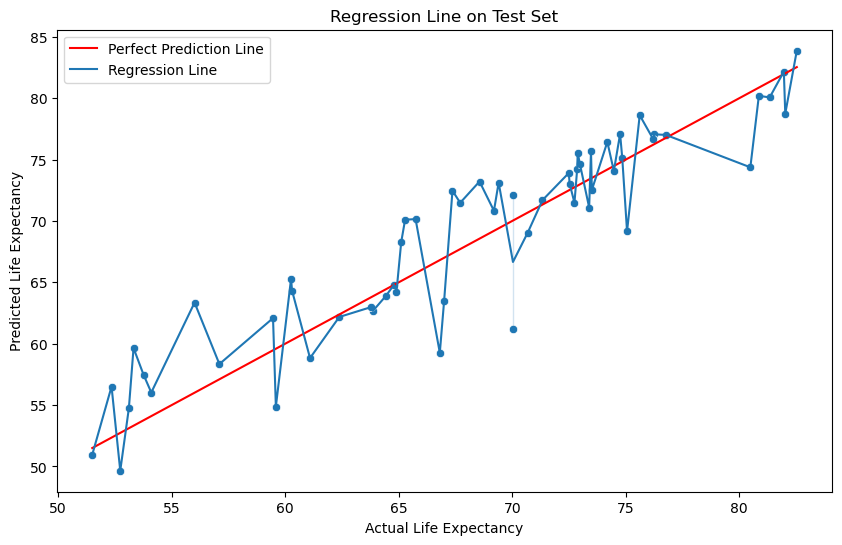

In [28]:
# Scatter plot of actual vs. predicted values

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')

# Plotting the regression line
sns.lineplot(x=y_test, y=y_test, color='red', label='Perfect Prediction Line')
sns.lineplot(x=y_test, y=y_pred, label='Regression Line')

plt.title('Regression Line on Test Set')
plt.legend()
plt.savefig('linear_regression_scatterplot.png')
plt.show()

###### Interpretation:

As was hypothesized above, life expectancy is predicted to go up over time. 

#### How well did the model perform?

The model performed better than expected, as the R2 score was around 0.84, which is high especially for the amount of variables involved. 11 for MSE also seems to be a low number, which also indicates that the model outperformed expectations.